In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

In [5]:
# Chargement du fichier csv
happy = pd.read_csv('happycommun1.csv')
happy.head()

,Continent,Regional indicator,Country name,year,Life Ladder,Economic Freedom,Personal Freedom,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Asia,Southern Asia,Afghanistan,2008,3.723590,NaN,NaN,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Asia,Southern Asia,Afghanistan,2009,4.401778,NaN,NaN,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Asia,Southern Asia,Afghanistan,2010,4.758381,NaN,NaN,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Asia,Southern Asia,Afghanistan,2011,3.831719,NaN,NaN,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Asia,Southern Asia,Afghanistan,2012,3.782938,NaN,NaN,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [6]:
# Filtrage sur l'Europe
happyeurope=happy.loc[happy['Continent']=='Europe']
happyeurope=happyeurope.drop('Continent', axis=1)
happyeurope.head()

,Regional indicator,Country name,year,Life Ladder,Economic Freedom,Personal Freedom,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
15,Southern Europe,Albania,2007,4.634252,7.31,8.41,9.121522,0.821372,66.760002,0.528605,-0.013059,0.874700,0.488819,0.246335
16,Southern Europe,Albania,2009,5.485470,7.26,8.39,9.241248,0.833047,67.320000,0.525223,-0.161825,0.863665,0.564474,0.279257
17,Southern Europe,Albania,2010,5.268937,7.30,8.41,9.282612,0.733152,67.599998,0.568958,-0.176219,0.726262,0.576077,0.300060
18,Southern Europe,Albania,2011,5.867422,7.31,8.29,9.310437,0.759434,67.879997,0.487496,-0.208715,0.877003,0.565759,0.256577
19,Southern Europe,Albania,2012,5.510124,7.46,8.17,9.326161,0.784502,68.160004,0.601512,-0.172988,0.847675,0.553473,0.271393


In [7]:
# Séparation des données en un DF "feats" avec les variables explicatives et "target" avec la variable cible Life Ladder
feats=happyeurope.drop('Life Ladder', axis=1)
target=happyeurope['Life Ladder']

In [8]:
# Création du jeu d'entraînement et du jeu de test avec une répartition 75/25.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.25, random_state=42)

In [9]:
# PREPROCESSING
# AFFICHAGE DES DONNEES MANQUUANTE
happyeurope.isna().sum()

Regional indicator                    0
Country name                          0
year                                  0
Life Ladder                           0
Economic Freedom                    142
Personal Freedom                    142
Log GDP per capita                    3
Social support                        0
Healthy life expectancy at birth     17
Freedom to make life choices          1
Generosity                           19
Perceptions of corruption             6
Positive affect                       1
Negative affect                       0
dtype: int64

In [10]:
# TRAIEMENT DES DONNEES MANQUANTE
# Remplacement des Nan par la mediane par année et par region

# Identification des colonnes à traiter
columns_to_impute = [ 'Log GDP per capita','Social support', 'Healthy life expectancy at birth','Freedom to make life choices', 
                     'Generosity','Perceptions of corruption', 'Positive affect', 'Negative affect', 'Economic Freedom', 'Personal Freedom']
# Remplacement des NaN par la médiane par région et par année dans le jeu d'entrainement
for column in columns_to_impute:
     # Calcul de la médiane par région et par année
    median_values = X_train.groupby(['Regional indicator', 'year'])[column].median()
    for (regions, year), median in median_values.items():
        X_train.loc[(X_train['Regional indicator'] == regions) & (X_train['year'] == year) & (X_train[column].isna()), column] = median
        
X_train.isna().sum()

Regional indicator                   0
Country name                         0
year                                 0
Economic Freedom                    54
Personal Freedom                    54
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                          11
Perceptions of corruption            0
Positive affect                      0
Negative affect                      0
dtype: int64

In [11]:
# Remplacement des Nan par la mediane par colonne par année et par region dans le jeu de test
for column in columns_to_impute:
     # Calcul de la médiane par région et par année
    median_values = X_train.groupby(['Regional indicator', 'year'])[column].median()
    for (regions, year), median in median_values.items():
        X_test.loc[(X_test['Regional indicator'] == regions) & (X_test['year'] == year) & (X_test[column].isna()), column] = median
X_test.isna().sum()

Regional indicator                   0
Country name                         0
year                                 0
Economic Freedom                    26
Personal Freedom                    26
Log GDP per capita                   0
Social support                       0
Healthy life expectancy at birth     0
Freedom to make life choices         0
Generosity                           3
Perceptions of corruption            0
Positive affect                      0
Negative affect                      0
dtype: int64

In [12]:
# Affichage des Nan de 'Economic Freedom', 'Personal Freedom' 
X_train.loc[X_train[['Economic Freedom', 'Personal Freedom']].isna().any(axis=1)].head(20)

,Regional indicator,Country name,year,Economic Freedom,Personal Freedom,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1175,Northern Europe,Latvia,2022,NaN,NaN,10.396153,0.928090,66.500000,0.817082,0.017752,0.844230,0.631816,0.160736
538,Eastern Europe,Czech Republic,2023,NaN,NaN,10.638618,0.926696,69.300003,0.906065,0.025248,0.831691,0.750118,0.254332
1882,Southern Europe,Slovenia,2023,NaN,NaN,10.664345,0.910655,71.400002,0.931499,0.031082,0.750028,0.614538,0.256446
1418,Southern Europe,Montenegro,2023,NaN,NaN,10.040676,0.853136,67.400002,0.798819,-0.066015,0.705612,0.480803,0.317709
970,Northern Europe,Ireland,2023,NaN,NaN,11.675588,0.921254,71.500000,0.902766,0.182178,0.373317,0.741770,0.245300
291,Eastern Europe,Bulgaria,2023,NaN,NaN,10.272790,0.934916,66.699997,0.754324,-0.131298,0.947856,0.539439,0.191884
2017,Western Europe,Switzerland,2023,NaN,NaN,11.169257,0.903757,73.300003,0.890972,0.103554,0.246744,0.745368,0.184582
290,Eastern Europe,Bulgaria,2022,NaN,NaN,10.197016,0.952761,66.599998,0.741359,-0.151570,0.941626,0.581908,0.165302
30,Southern Europe,Albania,2023,NaN,NaN,9.688706,0.690753,69.199997,0.871545,0.067885,0.855425,0.597349,0.314227
1498,Western Europe,Netherlands,2023,NaN,NaN,10.977064,0.914922,71.699997,0.847287,0.222541,0.423908,0.692706,0.201695


In [13]:
# les Nan restantes ont l'air d'etre sur les années 2022 et 2023. 
# Remplacement des Nan par la mediane par region pour les variables ayant toujours des Nan dans le jeu d'entrainement

# Identification des colonnes à traiter
columns_to_impute = [ 'Log GDP per capita','Healthy life expectancy at birth','Positive affect','Social support', 'Freedom to make life choices', 'Generosity','Perceptions of corruption','Economic Freedom', 'Personal Freedom']

# Remplacement des NaN par la médiane par région
for column in columns_to_impute:
     # Calcul de la médiane par région
    median_values = X_train.groupby(['Regional indicator'])[column].median()
    for (regions), median in median_values.items():
        X_train.loc[(X_train['Regional indicator'] == regions) & (X_train[column].isna()), column] = median

X_train.isna().sum()

Regional indicator                  0
Country name                        0
year                                0
Economic Freedom                    0
Personal Freedom                    0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [14]:
# Meme chose dans le jeu de test

# Identification des colonnes à traiter
columns_to_impute = [ 'Log GDP per capita','Healthy life expectancy at birth','Positive affect','Social support', 'Freedom to make life choices', 'Generosity','Perceptions of corruption','Economic Freedom', 'Personal Freedom']

# Remplacement des NaN par la médiane par région
for column in columns_to_impute:
    
     # Calcul de la médiane par région
    median_values = X_train.groupby(['Regional indicator'])[column].median()
    for (regions), median in median_values.items():
        X_test.loc[(X_test['Regional indicator'] == regions) & (X_test[column].isna()), column] = median

X_test.isna().sum()

Regional indicator                  0
Country name                        0
year                                0
Economic Freedom                    0
Personal Freedom                    0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [15]:
# Affichage des colonnes numériques
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
print (numeric_cols)

Index(['year', 'Economic Freedom', 'Personal Freedom', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')


In [16]:
# Mise sur la meme echelle des variables numériques sur le jeu d'entrainement
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))
numeric_cols =['Economic Freedom', 'Personal Freedom', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
# Puis application sur le jeu de test
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

X_train.head()

,Regional indicator,Country name,year,Economic Freedom,Personal Freedom,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
22,Southern Europe,Albania,2015,7.922374,6.291560,1.860610,0.047743,7.046701,6.254430,3.199133,8.817261,3.286915,7.761959
287,Eastern Europe,Bulgaria,2019,7.922374,5.933504,4.246839,8.942073,5.192308,7.909124,2.822556,9.513978,3.225571,3.102909
1723,Eastern Europe,Romania,2007,7.488584,7.263427,3.699931,2.844765,4.203296,6.000746,1.827275,9.584836,3.187153,5.477885
1232,Northern Europe,Lithuania,2019,9.086758,8.439898,5.911183,8.060068,5.467029,7.325277,1.026759,7.588779,3.015257,5.460191
1704,Southern Europe,Portugal,2011,7.716895,9.156010,5.300245,6.285603,7.417581,8.654116,2.019038,9.744209,5.543589,5.557573


§ ENCODAGE

L'encodage de données est le processus de transformation des variables catégoriques (ou qualitatives) en un format numérique que les modèles de machine learning peuvent utiliser.
Les algorithmes de machine learning fonctionnent généralement mieux avec des données numériques, donc il est nécessaire de convertir les variables non numériques pour qu'elles soient exploitables
Les variables à encoder sont: le régional indicator et le Country name.
Le ONEHOTENCODER est d'abord calculée sur le jeu d'entrainement et appliquée sur le jeu d'entrainement et de test

- insertion 5 lignes du df après traitement de l'encodage

In [18]:
#  Encodage des modalités des variables explicatives Sous-région et pays à l'aide d'un OneHotEncoder 

from sklearn.preprocessing import OneHotEncoder

# Colonnes à encoder par leur nom
columns_to_encode = ['Regional indicator', 'Country name']

# Application du OneHotEncoder
encoder = OneHotEncoder(drop = 'first',sparse_output=False)
encoded_colstrain = encoder.fit_transform(X_train[columns_to_encode])
encoded_colstest = encoder.fit_transform(X_test[columns_to_encode])

# Obtention du noms des nouvelles colonnes
encoded_col_names = encoder.get_feature_names_out(columns_to_encode)
encoded_dftrain = pd.DataFrame(encoded_colstrain, columns=encoded_col_names, index=X_train.index)
encoded_dftest = pd.DataFrame(encoded_colstest, columns=encoded_col_names, index=X_test.index)

# Conservation des autres colonnes
remaining_dftrain = X_train.drop(columns=columns_to_encode)
remaining_dftest = X_test.drop(columns=columns_to_encode)

# Combinaison du DataFrame encodé avec les colonnes restantes
Xtrain= pd.concat([encoded_dftrain, remaining_dftrain], axis=1)
Xtest= pd.concat([encoded_dftest, remaining_dftest], axis=1)

Xtrain.head()


,Regional indicator_Northern Europe,Regional indicator_Southern Europe,Regional indicator_Western Europe,Country name_Austria,Country name_Belarus,Country name_Belgium,Country name_Bosnia and Herzegovina,Country name_Bulgaria,Country name_Croatia,Country name_Cyprus,...,Economic Freedom,Personal Freedom,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.922374,6.291560,1.860610,0.047743,7.046701,6.254430,3.199133,8.817261,3.286915,7.761959
287,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,7.922374,5.933504,4.246839,8.942073,5.192308,7.909124,2.822556,9.513978,3.225571,3.102909
1723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.488584,7.263427,3.699931,2.844765,4.203296,6.000746,1.827275,9.584836,3.187153,5.477885
1232,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.086758,8.439898,5.911183,8.060068,5.467029,7.325277,1.026759,7.588779,3.015257,5.460191
1704,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.716895,9.156010,5.300245,6.285603,7.417581,8.654116,2.019038,9.744209,5.543589,5.557573


§§ MODELISATION

§ GRAPHIQUE DE REGRESSION LINEAIRE

La droite de regression est tracé sur le nuage de point des valeurs prédites. Les valeurs prédites se trouvent bien sur la droite. 
Bien que la visualisation soit trés parlante, il n'est pas simple de quantifier les erreurs du modèle de regression.
Nous allons donc voir une pratique permettant de mesurer la qualité du modèle sur le jeu de données. 

- insertion graphique de regression lineaire

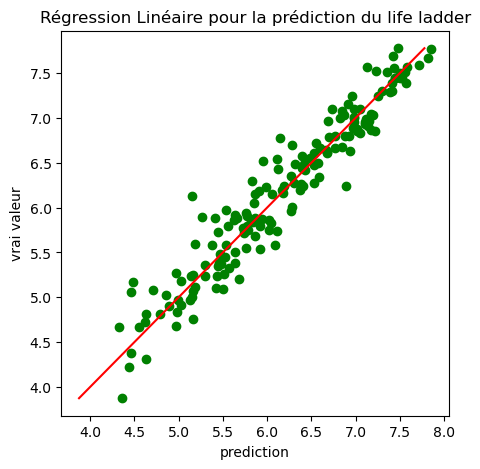

In [20]:
# MODELISATION
# Graphique de regression linéaire

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(Xtrain, y_train)

import matplotlib.pyplot as plt
fig = plt.figure(figsize = (5,5))
pred_test = lr.predict(Xtest)
plt.scatter(pred_test, y_test, c='green')
plt.plot((y_test.min(), y_test.max()), (y_test.min(), y_test.max()), color = 'red')
plt.xlabel("prediction")
plt.ylabel("vrai valeur")
plt.title('Régression Linéaire pour la prédiction du life ladder')
plt.show()


§ CALCUL DES METRIQUE R² ET MAE

Une des solutions permettant d'analyser la performance du modèle est de calculer des metriques de performance:
- La MAE correspond à la moyenne des differences absolues entre les vraies valeurs et les valeurs predites du modèle. Donc plus proche de 0 est la valeur, meilleure est la note du modèle
- Le R² reflète la qualité de l'ajustement d'un modèle de régression. Il indique dans quelle mesure le modèle est capable de prédire les valeurs cibles à partir des variables indépendantes. Plus proche de un est la valeur, meilleure est la note du modele.

Lorsque la MAE sur le jeu d'entrainement est moins élevé que sur le jeu de test on peut identifier du surapprentissage.
Lorsque le R² sur le jeu d'entrainement est plus élevé que sur le jeu de test on peut identifier du surapprentissage.

- insertion tableau des métriques

La MAE sur le jeu d'entrainement est moins élevé que sur le jeu de test on identifie du surapprentissage.
Le R² sur le jeu d'entrainement est plus élevé que sur le jeu de test on peut identifie du surapprentissage.
Pour pallier à ce probleme on va ajouter un autre parametre min_samples_leaf et re-entrainer les modèles

In [22]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
import xgboost as xgb
from xgboost import XGBRegressor

In [24]:
# Calcul des métriques MAE et R²
# Instanciation d'un objet XGBoost
from xgboost import XGBRegressor
xgb = XGBRegressor (random_state=42) 
xgb.fit(Xtrain, y_train)

# Instanciation d'un objet DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42) 
dtr.fit(Xtrain, y_train)

# Instanciation d'un objet RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor 
rfr = RandomForestRegressor(random_state=42) 
rfr.fit(Xtrain, y_train)

# Calcul des métriques  MAE, R² sur le jeu d'entraînement et le jeu de test
import sklearn.metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Métriques du XGBoost
y_pred_train_xgb = xgb.predict(Xtrain)
y_pred_test_xgb = xgb.predict(Xtest)
mae_train_xgb = mean_absolute_error(y_train,y_pred_train_xgb)
mae_test_xgb = mean_absolute_error(y_test,y_pred_test_xgb)
r2_train_xgb= r2_score(y_train,y_pred_train_xgb)
r2_test_xgb = r2_score(y_test,y_pred_test_xgb)

# Métriques du LinearRegressor
y_pred_train_lr = lr.predict(Xtrain)
y_pred_test_lr = lr.predict(Xtest)
mae_train_lr = mean_absolute_error(y_train,y_pred_train_lr)
mae_test_lr = mean_absolute_error(y_test,y_pred_test_lr)
r2_train_lr= r2_score(y_train,y_pred_train_lr)
r2_test_lr = r2_score(y_test,y_pred_test_lr)

# Métriques du DecisionTree
y_pred_test_dtr = dtr.predict(Xtest)
y_pred_train_dtr = dtr.predict(Xtrain)
mae_train_dtr = mean_absolute_error(y_train,y_pred_train_dtr)
mae_test_dtr = mean_absolute_error(y_test,y_pred_test_dtr)
r2_train_dtr=r2_score(y_train,y_pred_train_dtr)
r2_test_dtr = r2_score(y_test,y_pred_test_dtr)

# Métriques du RandomForest 
y_pred_test_rfr = rfr.predict(Xtest)
y_pred_train_rfr = rfr.predict(Xtrain)
mae_train_rfr = mean_absolute_error(y_train,y_pred_train_rfr)
mae_test_rfr = mean_absolute_error(y_test,y_pred_test_rfr)
r2_train_rfr=r2_score(y_train,y_pred_train_rfr)
r2_test_rfr = r2_score(y_test,y_pred_test_rfr)

# Creation d'un dataframe pour comparer les metriques des différents modèles 
data = {'MAE train': [mae_train_dtr, mae_train_rfr,mae_train_lr, mae_train_xgb],
        'MAE test': [mae_test_dtr, mae_test_rfr, mae_test_lr, mae_test_xgb ],
        'R² train':[r2_train_dtr,r2_train_rfr,r2_train_lr,r2_train_xgb],
        'R² test' : [r2_test_dtr,r2_test_rfr,r2_test_lr, r2_test_xgb ]}
df = pd.DataFrame(data, index = ['Decision Tree', 'Random Forest ','Regression linéaire', 'XGBoost'])
df.head()


,MAE train,MAE test,R² train,R² test
Decision Tree,0.000000,0.288754,1.000000,0.797605
Random Forest,0.076960,0.201881,0.988186,0.910092
Regression linéaire,0.178489,0.187942,0.936262,0.920529
XGBoost,0.003269,0.215525,0.999975,0.899009


§ RECALCUL DES METRIQUES EN LIMITANT LE SURAPPRENTISSAGE

- insérer le tableau des nouvelles metriques

- Les méthodes sont plus stable entre le jeu d'entrainement et le jeu de test mais il y a plus d'erreurs.
- La méthode la plus adapté à notre jeu de données est la regression lineaire

In [26]:
# Recalcul des métriques en limitant le surapprentissage

# Instanciation d'un objet XGBoost
from xgboost import XGBRegressor
xgb2 = XGBRegressor (random_state=42) 
xgb2.fit(Xtrain, y_train)

# Instanciation d'un objet DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr2 = DecisionTreeRegressor(max_depth = 3 , min_samples_leaf = 25, random_state=42) 
dtr2.fit(Xtrain, y_train)

# Instanciation d'un objet RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor 
rfr2 = RandomForestRegressor(max_depth = 3 , min_samples_leaf = 25, random_state=42) 
rfr2.fit(Xtrain, y_train)

# Instanciation d'un objet Linearregression
from sklearn.linear_model import LinearRegression
lr2=LinearRegression()
lr2.fit(Xtrain, y_train)

# Calcul des métriques MAE, R² sur le jeu d'entraînement et le jeu de test
import sklearn.metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Métriques du XGBoost
y_pred_train_xgb2 = xgb2.predict(Xtrain)
y_pred_test_xgb2 = xgb2.predict(Xtest)
mae_train_xgb2 = mean_absolute_error(y_train,y_pred_train_xgb2)
mae_test_xgb2 = mean_absolute_error(y_test,y_pred_test_xgb2)
r2_train_xgb2= r2_score(y_train,y_pred_train_xgb2)
r2_test_xgb2 = r2_score(y_test,y_pred_test_xgb2)

# Métriques du LinearRegressor
y_pred_train_lr2 = lr2.predict(Xtrain)
y_pred_test_lr2 = lr2.predict(Xtest)
mae_train_lr2 = mean_absolute_error(y_train,y_pred_train_lr2)
mae_test_lr2 = mean_absolute_error(y_test,y_pred_test_lr2)
r2_train_lr2=r2_score(y_train,y_pred_train_lr2)
r2_test_lr2 = r2_score(y_test,y_pred_test_lr2)

# Métriques du DecisionTree
y_pred_test_dtr2 = dtr2.predict(Xtest)
y_pred_train_dtr2 = dtr2.predict(Xtrain)
mae_train_dtr2 = mean_absolute_error(y_train,y_pred_train_dtr2)
mae_test_dtr2 = mean_absolute_error(y_test,y_pred_test_dtr2)
r2_train_dtr2= r2_score(y_train,y_pred_train_dtr2)
r2_test_dtr2 = r2_score(y_test,y_pred_test_dtr2)

# Métriques du RandomForest 
y_pred_test_rfr2 = rfr2.predict(Xtest)
y_pred_train_rfr2 = rfr2.predict(Xtrain)
mae_train_rfr2 = mean_absolute_error(y_train,y_pred_train_rfr2)
mae_test_rfr2 = mean_absolute_error(y_test,y_pred_test_rfr2)
r2_train_rfr2= r2_score(y_train,y_pred_train_rfr2)
r2_test_rfr2 = r2_score(y_test,y_pred_test_rfr2)

# Creation d'un dataframe pour comparer les metriques des différents modèles 
data2 = {'MAE train': [mae_train_dtr, mae_train_rfr,mae_train_lr, mae_train_xgb2],
        'MAE test': [mae_test_dtr, mae_test_rfr, mae_test_lr, mae_test_xgb2 ],
        'R² train':[r2_train_dtr,r2_train_rfr,r2_train_lr,r2_train_xgb2],
        'R² test' : [r2_test_dtr,r2_test_rfr,r2_test_lr, r2_test_xgb2 ]}
df2 = pd.DataFrame(data, index = ['Decision Tree', 'Random Forest ','Regression linéaire', 'XGBoost'])
df2.head()


,MAE train,MAE test,R² train,R² test
Decision Tree,0.000000,0.288754,1.000000,0.797605
Random Forest,0.076960,0.201881,0.988186,0.910092
Regression linéaire,0.178489,0.187942,0.936262,0.920529
XGBoost,0.003269,0.215525,0.999975,0.899009


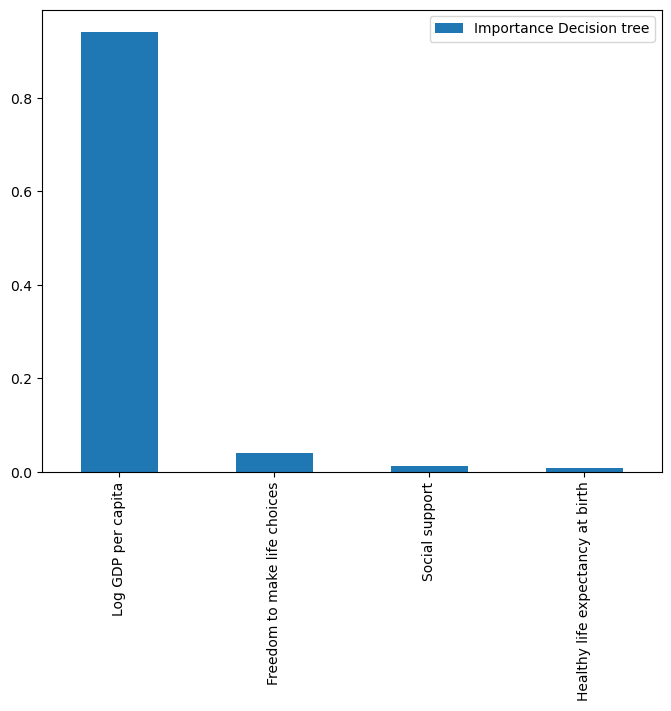

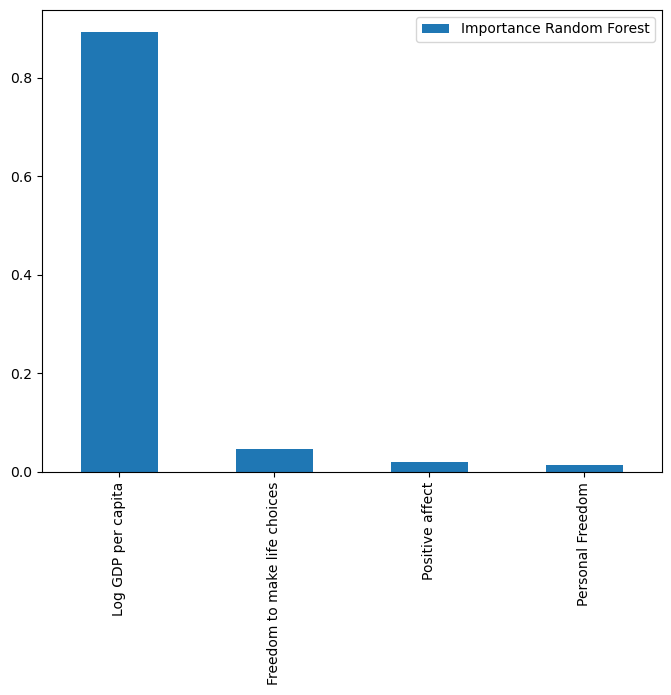

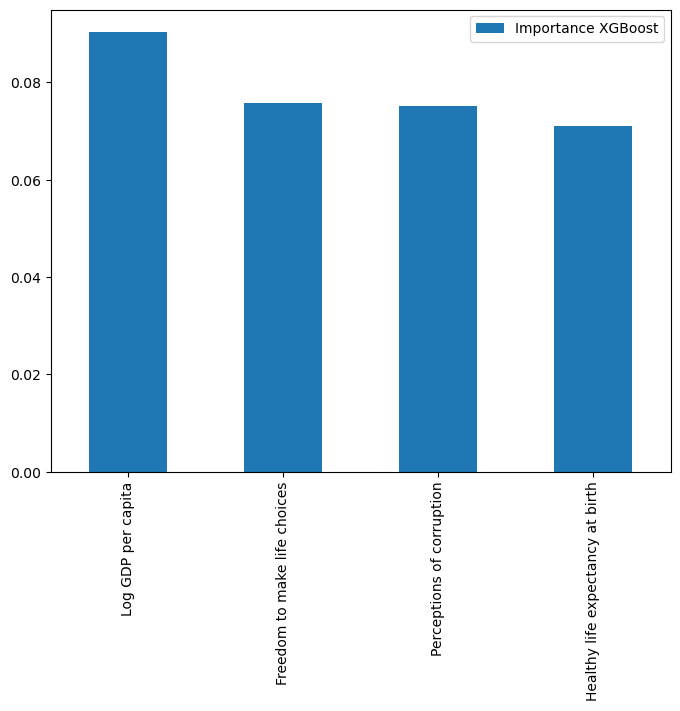

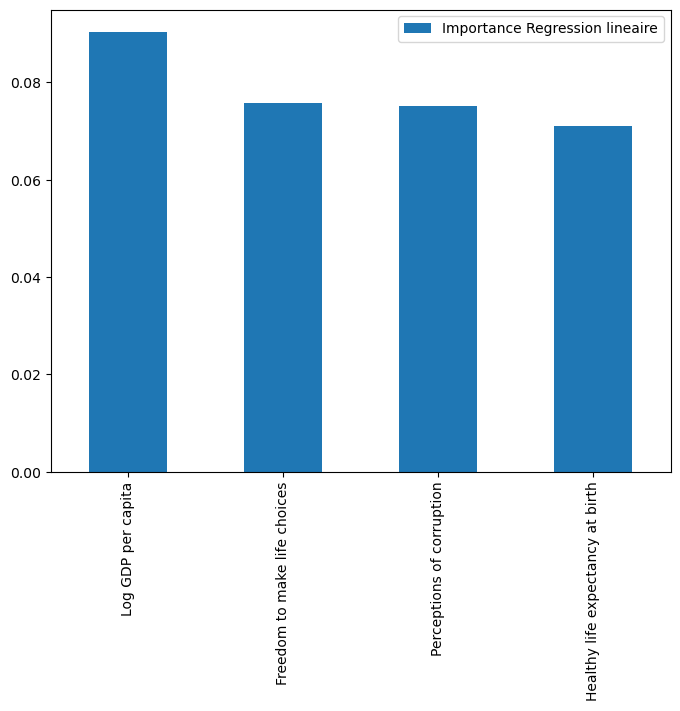

In [27]:
# FEATURE IMPORTANCE

from sklearn import tree

# Affichage de l'importance des variables du modèle DecisionTreeRegressor
%matplotlib inline
feat_importancesdtr = pd.DataFrame(dtr2.feature_importances_, index=Xtrain.columns, columns=["Importance Decision tree"])
feat_importancesdtr.sort_values(by='Importance Decision tree', ascending=False, inplace=True)
feat_importancesdtr.nlargest(4, "Importance Decision tree").plot(kind='bar', figsize=(8,6))
plt.show()

# Affichage de l'importance des variables du modèle RandomForestRegressor
feat_importancesrfr = pd.DataFrame(rfr2.feature_importances_, index=Xtrain.columns, columns=["Importance Random Forest"])
feat_importancesrfr.sort_values(by='Importance Random Forest', ascending=False, inplace=True)
feat_importancesrfr.nlargest(4, "Importance Random Forest").plot(kind='bar', figsize=(8,6))
plt.show()

# Affichage de l'importance des variables du modèle XGBOOST
colonnes_utiles = [
    'Log GDP per capita', 
    'Social support', 
    'Healthy life expectancy at birth', 
    'Freedom to make life choices', 
    'Generosity',
    'Economic Freedom',
    'Personal Freedom',
    'Perceptions of corruption',
    'Positive affect',
    'Negative affect']
X_train_subset = X_train[colonnes_utiles]
XGBB = LinearRegression()
XGBB.fit(X_train_subset, y_train)
X_test_subset = X_test[colonnes_utiles]
y_pred = XGBB.predict(X_test_subset)
coeff_importancesXGBB = np.abs(XGBB.coef_)
feat_importancesxgb = pd.DataFrame(coeff_importancesXGBB, index=X_train_subset.columns, columns=["Importance XGBoost"])
feat_importancesxgb.sort_values(by='Importance XGBoost', ascending=False, inplace=True)
feat_importancesxgb.nlargest(4, "Importance XGBoost").plot(kind='bar', figsize=(8,6))
plt.show()

# Affichage de l'importance des variables du modèle Linearregressor
colonnes_utiles = [
    'Log GDP per capita', 
    'Social support', 
    'Healthy life expectancy at birth', 
    'Freedom to make life choices', 
    'Generosity',
    'Economic Freedom',
    'Personal Freedom',
    'Perceptions of corruption',
    'Positive affect',
    'Negative affect']
X_train_subset = X_train[colonnes_utiles]
lr3 = LinearRegression()
lr3.fit(X_train_subset, y_train)
X_test_subset = X_test[colonnes_utiles]
y_pred = lr3.predict(X_test_subset)
coeff_importances = np.abs(lr3.coef_)
feat_importanceslr = pd.DataFrame(coeff_importances, 
                                  index=X_train_subset.columns, 
                                  columns=["Importance Regression lineaire"])
feat_importanceslr.sort_values(by="Importance Regression lineaire", ascending=False, inplace=True)
feat_importanceslr.nlargest(4, "Importance Regression lineaire").plot(kind='bar', figsize=(8,6))
plt.show()




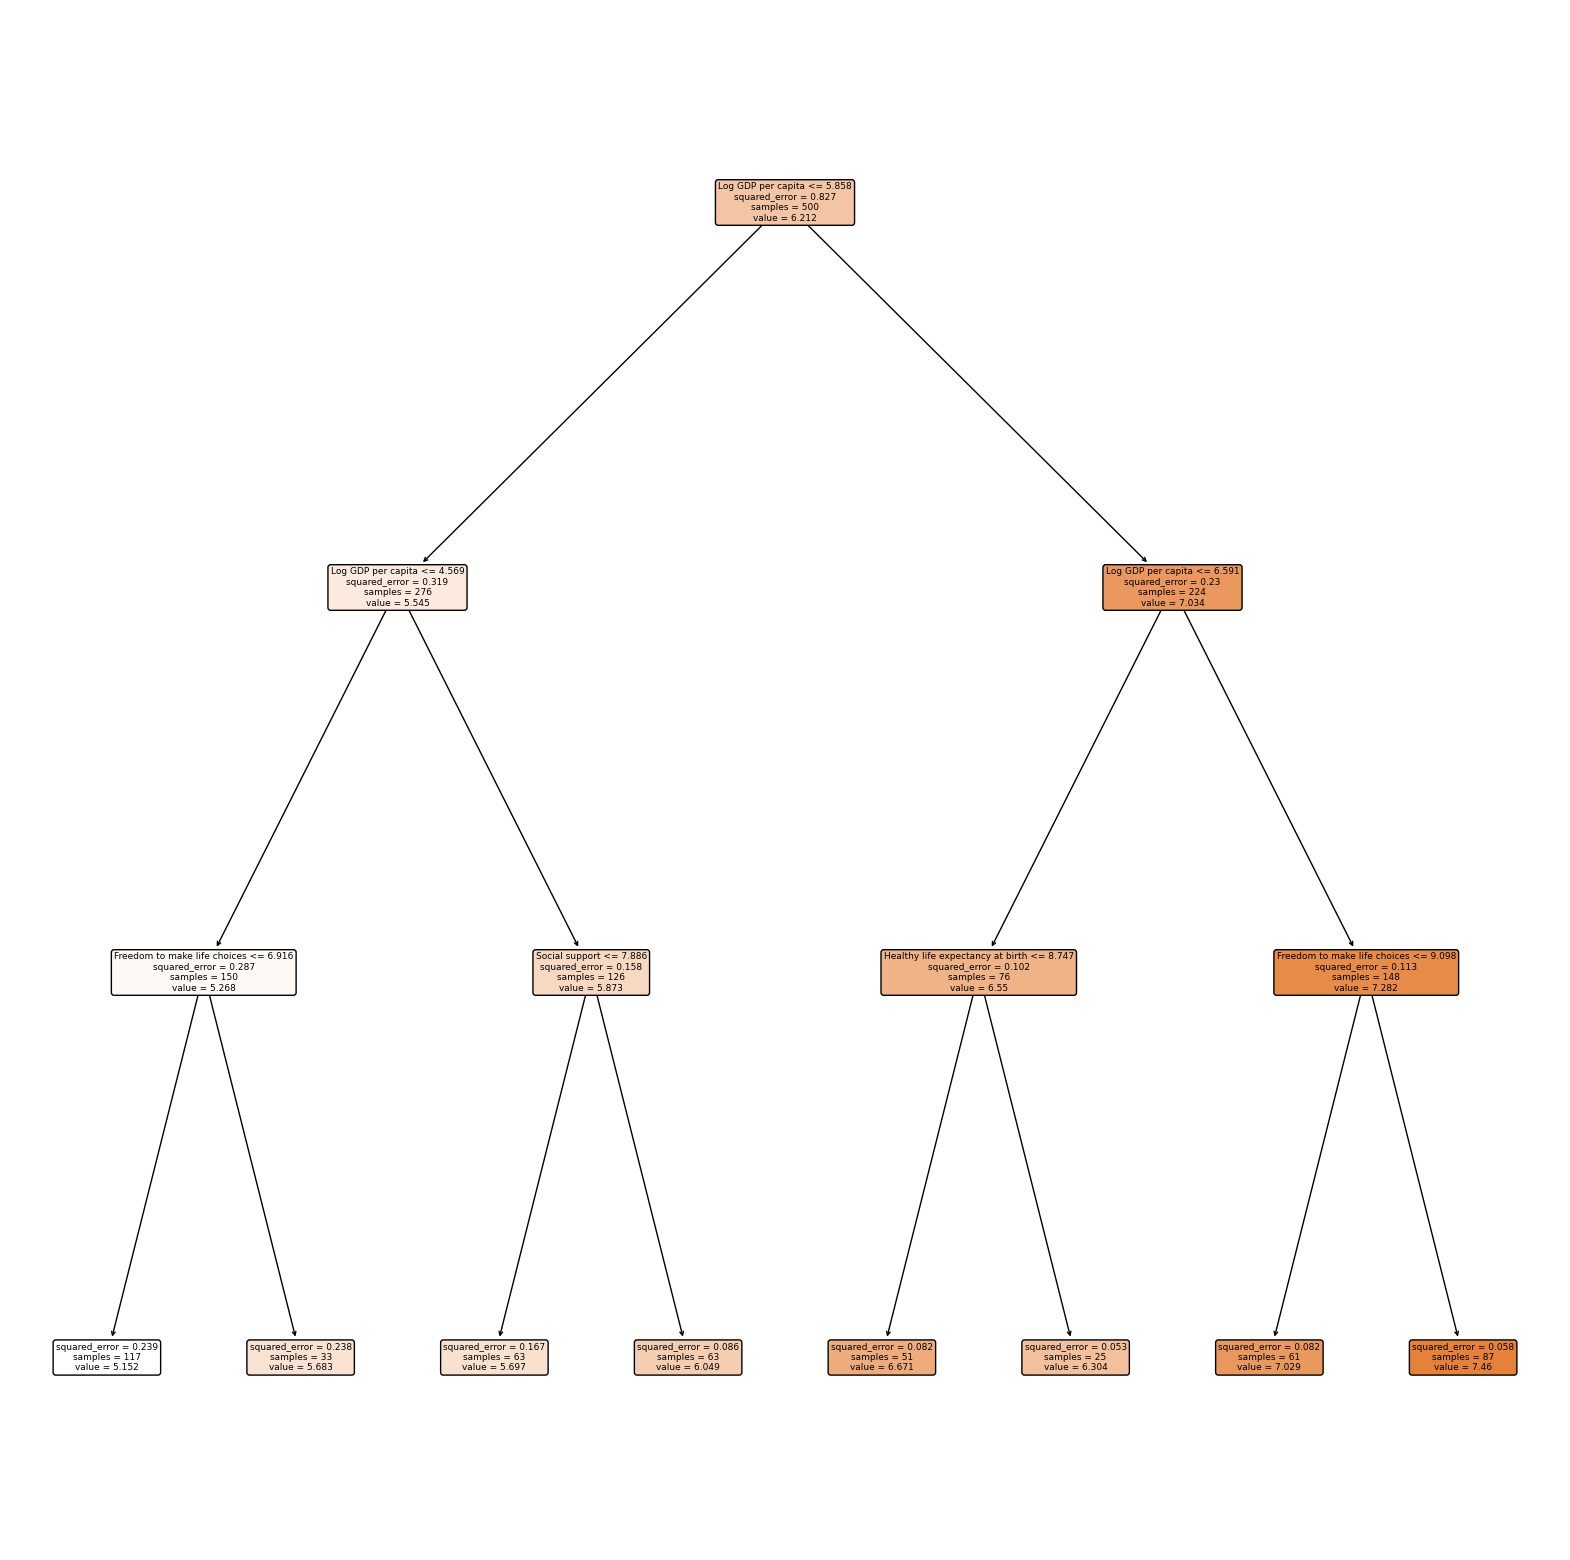

In [28]:
# Affichage de l'arbre de décision du modèle DecisionTreeRegressor
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(dtr2, 
          feature_names = Xtrain.columns, 
          filled = True, 
          rounded = True)
plt.show()


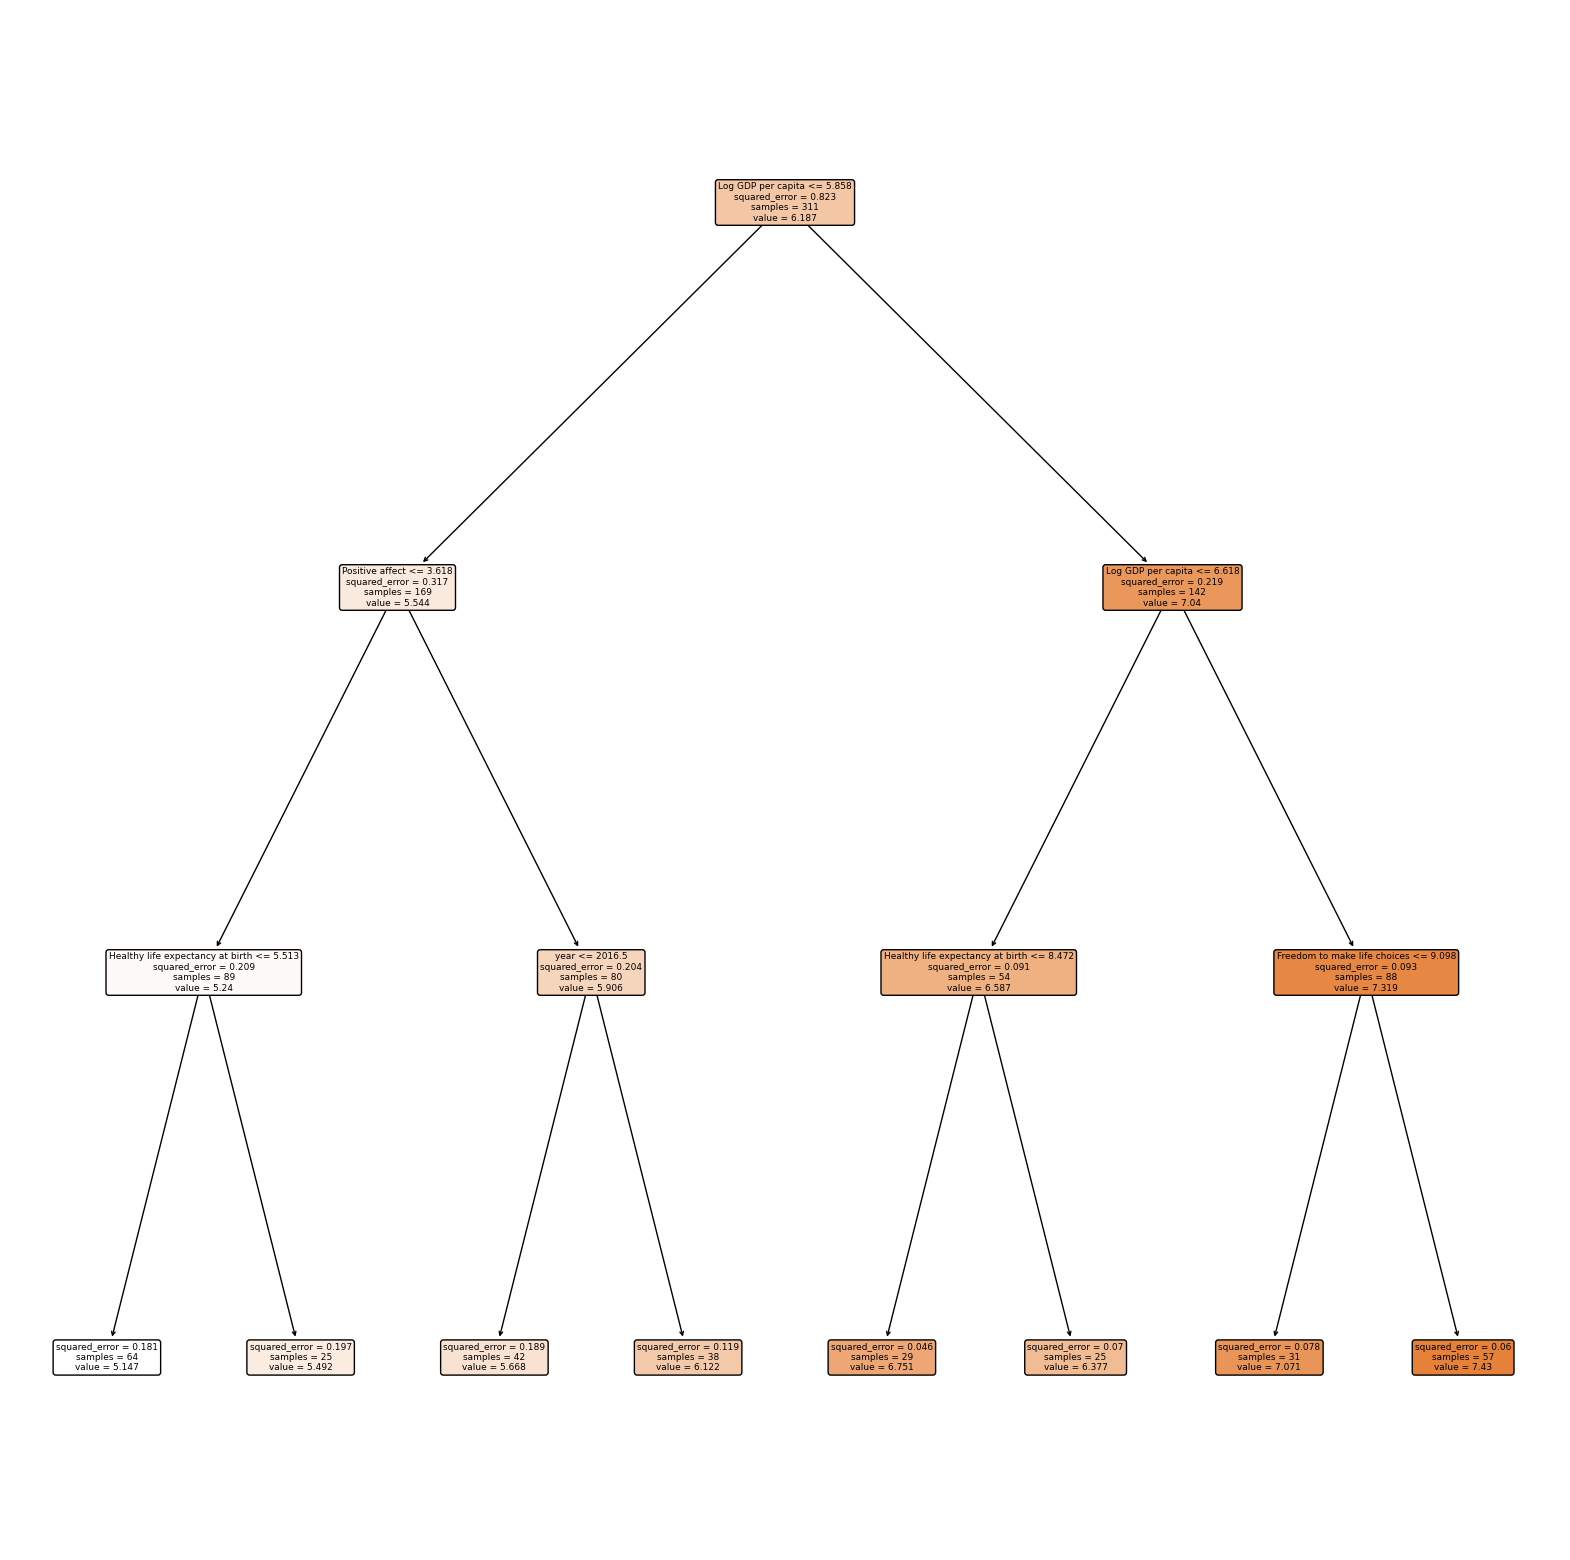

In [29]:
# Affichage de l'arbre de décision du modèle RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
one_tree = rfr2.estimators_[0]
fig, ax = plt.subplots(figsize=(20, 20))
plot_tree(one_tree, 
          feature_names = Xtrain.columns, 
          filled = True, 
          rounded = True)
plt.show()


In [30]:
# Tableau recap des variables les plus importante selon la Heatmap et les features importance des modèles
tabfeatimp = pd.read_excel('Recap importance des variable selon differentes methodes.xlsx',index_col=0)
tabfeatimp.head(8)

,Heatmap,DecisionTree,RandomForest,RegressionLinéaire
Log GDP per capita,1,1,1,1
Social Support,2,3,,
Healthy life expectancy at birth,3,4,,4
Economic freedom,4,,,
Freedom to make life choices,,2,2,2
Perceptions of corruption,,,,3
Positive affect,,,3,
Personal Freedom,,,4,


In [31]:
# Gridsearch - Paramètres

param_grid_xgb = {
    'max_depth': [3, 5, 10, None],
    'subsample': [0.5, 0.7, 0.9, 1.0]}
param_grid_dtr = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [5, 10, 25,50]}
param_grid_rfr = {
    'max_depth': [3, 5, 10, None],
    'min_samples_leaf': [5, 10, 25,50]}

In [32]:
# Application du Gridsearch sur le modèle DecisionTree 

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Initialiser le modèle
dtr = DecisionTreeRegressor(random_state=42)

# Configurer GridSearchCV
grid_search_dtr = GridSearchCV(estimator=dtr, param_grid=param_grid_dtr, cv=5, scoring='neg_mean_absolute_error')

# Ajuster GridSearchCV
grid_search_dtr.fit(Xtrain, y_train)

# Résultats
print("Meilleurs hyperparamètres (DecisionTree):", grid_search_dtr.best_params_)
print("Meilleur score (DecisionTree):", grid_search_dtr.best_score_)

Meilleurs hyperparamètres (DecisionTree): {'max_depth': 10, 'min_samples_leaf': 5}
Meilleur score (DecisionTree): -0.26737574353253696


In [33]:
# Application du Gridsearch sur le modèle XGBoost

# Initialiser le modèle
xgb = XGBRegressor (random_state=42)

# Configurer GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='neg_mean_absolute_error')

# Ajuster GridSearchCV
grid_search_xgb.fit(Xtrain, y_train)

# Résultats
print("Meilleurs hyperparamètres (XGBoost):", grid_search_xgb.best_params_)
print("Meilleur score (XGBoost):", grid_search_xgb.best_score_)

Meilleurs hyperparamètres (XGBoost): {'max_depth': 5, 'subsample': 1.0}
Meilleur score (XGBoost): -0.2080749888420105


In [34]:
# Application du Gridsearch sur le modèle RandomForest

from sklearn.ensemble import RandomForestRegressor

# Initialiser le modèle
rfr = RandomForestRegressor(random_state=42)

# Configurer GridSearchCV
grid_search_rfr = GridSearchCV(estimator=rfr, param_grid=param_grid_rfr, cv=5, scoring='neg_mean_absolute_error')

# Ajuster GridSearchCV
grid_search_rfr.fit(Xtrain, y_train)

# Résultats
print("Meilleurs hyperparamètres (RandomForest):", grid_search_rfr.best_params_)
print("Meilleur score (RandomForest):", grid_search_rfr.best_score_)

Meilleurs hyperparamètres (RandomForest): {'max_depth': None, 'min_samples_leaf': 5}
Meilleur score (RandomForest): -0.24022392233732695


In [35]:
# Recalcul des métriques avec les paramètres optimisés

# Instancier un objet XGBoost
from xgboost import XGBRegressor
xgb3 = XGBRegressor (max_depth = 5, subsample = 1.0,random_state=42) 
xgb3.fit(Xtrain, y_train)

# Instancier un objet DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr3 = DecisionTreeRegressor(max_depth = 10 , min_samples_leaf = 5, random_state=42) 
dtr3.fit(Xtrain, y_train)

# Instancier un objet RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor 
rfr3 = RandomForestRegressor(min_samples_leaf = 5, random_state=42) 
rfr3.fit(Xtrain, y_train)

# Instancier un objet Linearregression
from sklearn.linear_model import LinearRegression
lr3=LinearRegression()
lr3.fit(Xtrain, y_train)

# Calculer les métriques MAE, R² sur le jeu d'entraînement et le jeu de test
import sklearn.metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Métriques du XGBoost
y_pred_train_xgb3 = xgb3.predict(Xtrain)
y_pred_test_xgb3 = xgb3.predict(Xtest)
mae_train_xgb3 = mean_absolute_error(y_train,y_pred_train_xgb3)
mae_test_xgb3 = mean_absolute_error(y_test,y_pred_test_xgb3)
r2_train_xgb3= r2_score(y_train,y_pred_train_xgb3)
r2_test_xgb3 = r2_score(y_test,y_pred_test_xgb3)

# Métriques du LinearRegressor
y_pred_train_lr3 = lr3.predict(Xtrain)
y_pred_test_lr3 = lr3.predict(Xtest)
mae_train_lr3 = mean_absolute_error(y_train,y_pred_train_lr3)
mae_test_lr3 = mean_absolute_error(y_test,y_pred_test_lr3)
r2_train_lr3=r2_score(y_train,y_pred_train_lr3)
r2_test_lr3 = r2_score(y_test,y_pred_test_lr3)

# Métriques du DecisionTree
y_pred_test_dtr3 = dtr3.predict(Xtest)
y_pred_train_dtr3 = dtr3.predict(Xtrain)
mae_train_dtr3 = mean_absolute_error(y_train,y_pred_train_dtr3)
mae_test_dtr3 = mean_absolute_error(y_test,y_pred_test_dtr3)
r2_train_dtr3= r2_score(y_train,y_pred_train_dtr3)
r2_test_dtr3 = r2_score(y_test,y_pred_test_dtr3)


# Métriques du RandomForest 
y_pred_test_rfr3 = rfr3.predict(Xtest)
y_pred_train_rfr3 = rfr3.predict(Xtrain)
mae_train_rfr3 = mean_absolute_error(y_train,y_pred_train_rfr3)
mae_test_rfr3 = mean_absolute_error(y_test,y_pred_test_rfr3)
r2_train_rfr3= r2_score(y_train,y_pred_train_rfr3)
r2_test_rfr3 = r2_score(y_test,y_pred_test_rfr3)


# Creation d'un dataframe pour comparer les metriques des deux algorithmes 
data3 = {'MAE train': [mae_train_dtr3, mae_train_rfr3,mae_train_lr3, mae_train_xgb3],
        'MAE test': [mae_test_dtr3, mae_test_rfr3, mae_test_lr3, mae_test_xgb3 ],
        'R² train':[r2_train_dtr3,r2_train_rfr3,r2_train_lr3, r2_train_xgb3],
        'R² test' : [r2_test_dtr3,r2_test_rfr3,r2_test_lr3, r2_test_xgb3 ]}
df3 = pd.DataFrame(data3, index = ['Decision Tree', 'Random Forest ','Regression linéaire', 'XGBoost'])
df3.head()
 # PATRICK RAPPORT ML - TABLEAU  A INTEGRER

,MAE train,MAE test,R² train,R² test
Decision Tree,0.133844,0.310221,0.959913,0.787370
Random Forest,0.142361,0.224650,0.958608,0.887498
Regression linéaire,0.178489,0.187942,0.936262,0.920529
XGBoost,0.013601,0.207854,0.999593,0.897598


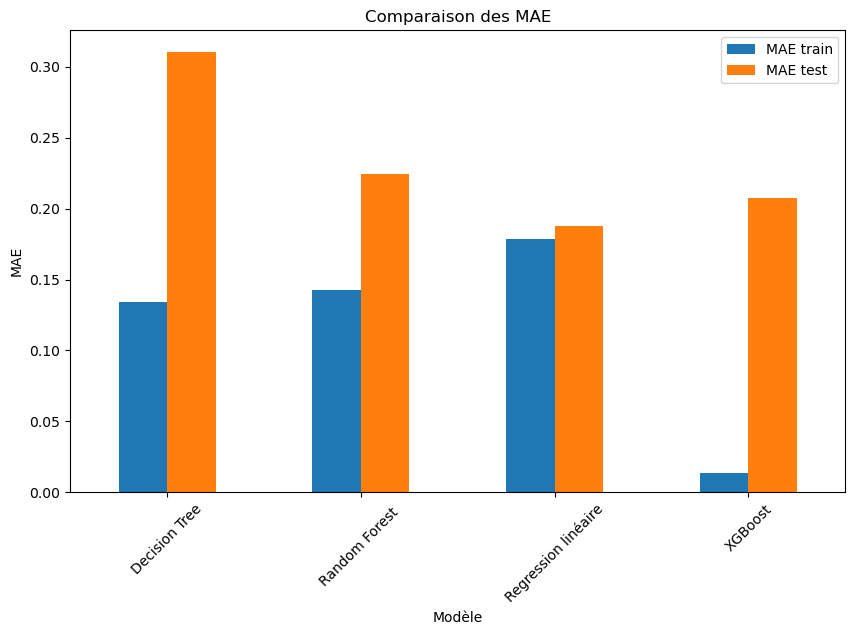

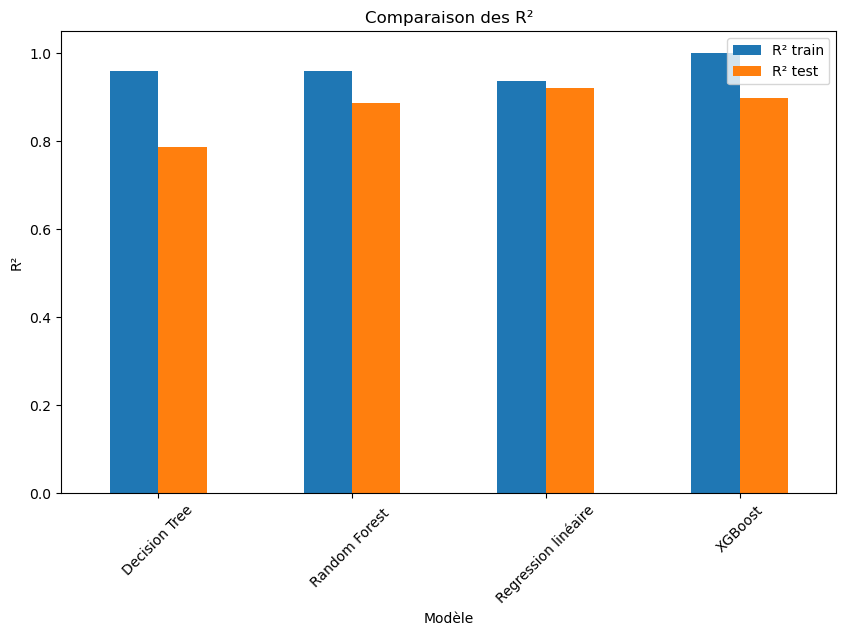

In [36]:
# Affichage des métriques par modèle en graphique

import matplotlib.pyplot as plt

# Comparaison des MAE
df3[['MAE train', 'MAE test']].plot(kind='bar', figsize=(10, 6), title="Comparaison des MAE")
plt.ylabel("MAE")
plt.xlabel("Modèle")
plt.xticks(rotation=45)
plt.show()

# Comparaison des R²
df3[['R² train', 'R² test']].plot(kind='bar', figsize=(10, 6), title="Comparaison des R²")
plt.ylabel("R²")
plt.xlabel("Modèle")
plt.xticks(rotation=45)
plt.show()